In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.optimizers import RMSprop, Adam

from rna_autoencoder import VariationalAutoEncoder, random_projection

In [2]:
data = pd.read_csv('clean_data/GSE70630.txt', sep='\t', index_col=0)
gene_counts = pd.read_csv('gene_counts.txt')

selected_genes = list(gene_counts[gene_counts['Count'] == 8]['Gene'])
X = data.T[selected_genes]
print(X.shape)

m, n = X.shape
tumor_ids = X.index.map(lambda i: i.split('-')[0])
tumor_ids = LabelEncoder().fit_transform(tumor_ids)
X_scaled = MinMaxScaler().fit_transform(X.values)

X_train, X_test = train_test_split(X_scaled)

(3711, 5491)


In [3]:
early_stopping = EarlyStopping(patience=50)
vae = VariationalAutoEncoder.build_vae(input_dim=n, tau=0.8, optimizer=Adam, learning_rate=0.0001, name='GSE102130')
vae.fit(X_train, X_train, 
        validation_data=(X_test, X_test), 
        epochs=500, 
        batch_size=16, 
        callbacks=[early_stopping])

Train on 2783 samples, validate on 928 samples
Epoch 1/500
2783/2783 [==============================] - 35s 13ms/sample - loss: 781.8025 - val_loss: 544.8063
Epoch 2/500
2783/2783 [==============================] - 26s 9ms/sample - loss: 480.1574 - val_loss: 430.5163
Epoch 3/500
2783/2783 [==============================] - 24s 9ms/sample - loss: 408.8603 - val_loss: 391.1100
Epoch 4/500
2783/2783 [==============================] - 25s 9ms/sample - loss: 382.9520 - val_loss: 373.6143
Epoch 5/500
2783/2783 [==============================] - 27s 10ms/sample - loss: 371.4769 - val_loss: 368.1349
Epoch 6/500
2783/2783 [==============================] - 24s 9ms/sample - loss: 366.7968 - val_loss: 362.7575
Epoch 7/500
2783/2783 [==============================] - 24s 9ms/sample - loss: 363.3952 - val_loss: 360.8407
Epoch 8/500
2783/2783 [==============================] - 26s 9ms/sample - loss: 361.5236 - val_loss: 360.1579
Epoch 9/500
2783/2783 [==============================] - 24s 8ms/sample

2783/2783 [==============================] - 23s 8ms/sample - loss: 348.7864 - val_loss: 348.7196
Epoch 148/500
2783/2783 [==============================] - 23s 8ms/sample - loss: 349.2171 - val_loss: 349.8646
Epoch 149/500
2783/2783 [==============================] - 20s 7ms/sample - loss: 349.3351 - val_loss: 348.7720
Epoch 150/500
2783/2783 [==============================] - 22s 8ms/sample - loss: 349.0253 - val_loss: 349.0340
Epoch 151/500
2783/2783 [==============================] - 21s 8ms/sample - loss: 348.7179 - val_loss: 349.0012
Epoch 152/500
2783/2783 [==============================] - 21s 8ms/sample - loss: 349.0783 - val_loss: 348.9612
Epoch 153/500
2783/2783 [==============================] - 22s 8ms/sample - loss: 348.9427 - val_loss: 349.4563
Epoch 154/500
2783/2783 [==============================] - 21s 8ms/sample - loss: 349.1316 - val_loss: 348.9047
Epoch 155/500
2783/2783 [==============================] - 21s 8ms/sample - loss: 349.0188 - val_loss: 348.9585
Epoch 

In [4]:
vae.plot_clusters(X_scaled, cell_names=X.index)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2 clusters: 0.39822614192962646
3 clusters: 0.4279226064682007
4 clusters: 0.37081941962242126
5 clusters: 0.39142531156539917
6 clusters: 0.4143630564212799
7 clusters: 0.4130934774875641
8 clusters: 0.3860699534416199
Optimal Clusters: 3


Loading BokehJS ...

In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from rna_autoencoder_test import plot_dimensionality_reduction

z = vae.reduce(X_scaled).numpy()
tumor_ids = LabelEncoder().fit_transform(X.index.map(lambda i: i.split('_')[0]))
df = pd.DataFrame(np.c_[tumor_ids, z], columns=['tumor_ids', 'z1', 'z2'])
df['cell'] = X.index
plot_dimensionality_reduction(df, x='z1', y='z2')

Loading BokehJS ...

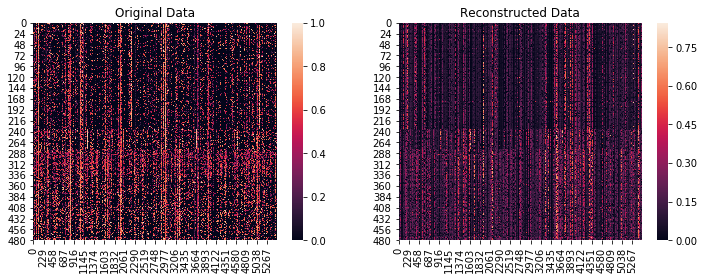

In [8]:
vae.plot_reconstructions(X_scaled[:500])

In [7]:
vae.save_model()

'models/VAE-GSE102130-20200130-111730'